Setzen von Konstanten

In [1]:
# -- Konstanten

MEAN = "mean"
MEDIAN = "median"
MAX = "max"
MIN = "min"

# -- Displaykonstanten
TITLE_PREFIX = "Progress "

X_AXIS = "iteration"
Y_AXIS = "result"

# -- Pfad Datei kram
HOME_PATH = "/home/"
METRIC_PREFIX = "metric_statistics_"
FILE_PREFIX = ".csv"
STATS_PREFIX = "statistics_"

# -- Metriken
FV = "FV"
FV_LONG = "Fitnessvariance"

PIC = "PIC"
PIC_LONG = "Population Information Content"

CR = "CR"
CR_LONG = "Change Rate"

AC = "AC"
AC_LONG = "Autocorrelation"

NV = "NV"
NV_LONG = "Neutrality Volume"

DIV = "DIV"
DIV_LONG = "Diversity"

FD = "FD"
FD_LONG = "Function Dispersion"

SV = "SVC"
SV_LONG = "State Variance"


Einlesen und Zusammenführen der Daten

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataframes = []
for i  in range(10):
    df = pd.read_csv(HOME_PATH + METRIC_PREFIX + str(i + 1) + FILE_PREFIX)
    df['run'] = i + 1
    dataframes.append(df)

metric_df = pd.concat(dataframes, ignore_index=True)

dataframes = []
for i  in range(10):
    df = pd.read_csv(HOME_PATH + STATS_PREFIX + str(i + 1) + FILE_PREFIX)
    df['run'] = i +1
    dataframes.append(df)

coverage_df = pd.concat(dataframes, ignore_index=True)

# full_df = pd.merge(metric_df, coverage_df, on='run')

print("Struktur der zusammengeführten Daten:")
display(metric_df.head())

max_iteration = metric_df['iteration'].max()
print("\nAnzahl der Iterationen:", max_iteration)

print("\nLetzte Zeilen der Daten:")
display(metric_df.tail())

print("\nErzielte Coverage:")
display(coverage_df)


Struktur der zusammengeführten Daten:


,module,iteration,populationSize,maxFitness,averageFitness,minFitness,metric,result,durationInMin,run
0,flutils.txtutils,5,13,5265.808914,1748.244811,114.517460,ACmean,0.256852,2.386774,1
1,flutils.txtutils,5,13,5265.808914,1748.244811,114.517460,ACmax,0.800000,2.386794,1
2,flutils.txtutils,5,13,5265.808914,1748.244811,114.517460,ACmedian,0.801061,2.386816,1
3,flutils.txtutils,5,13,5265.808914,1748.244811,114.517460,ACmin,0.800000,2.386837,1
4,flutils.txtutils,10,14,5265.808914,1650.048705,117.007381,ACmean,0.364104,4.487847,1



Anzahl der Iterationen: 30

Letzte Zeilen der Daten:


,module,iteration,populationSize,maxFitness,averageFitness,minFitness,metric,result,durationInMin,run
5280,flutils.txtutils,29,18,5265.808914,1877.705485,110.570023,SVCmin,5.965534e+06,15.033950,10
5281,flutils.txtutils,30,18,5265.808914,1877.705485,110.570023,SVCmean,6.038725e+06,15.625666,10
5282,flutils.txtutils,30,18,5265.808914,1877.705485,110.570023,SVCmax,5.894956e+06,15.625706,10
5283,flutils.txtutils,30,18,5265.808914,1877.705485,110.570023,SVCmedian,6.109466e+06,15.625739,10
5284,flutils.txtutils,30,18,5265.808914,1877.705485,110.570023,SVCmin,5.965534e+06,15.625760,10



Erzielte Coverage:


,TargetModule,Coverage,run
0,flutils.txtutils,0.669811,1
1,flutils.txtutils,0.820755,2
2,flutils.txtutils,0.811321,3
3,flutils.txtutils,0.811321,4
4,flutils.txtutils,0.811321,5
5,flutils.txtutils,0.792453,6
6,flutils.txtutils,0.669811,7
7,flutils.txtutils,0.650943,8
8,flutils.txtutils,0.792453,9
9,flutils.txtutils,0.669811,10


Fitness

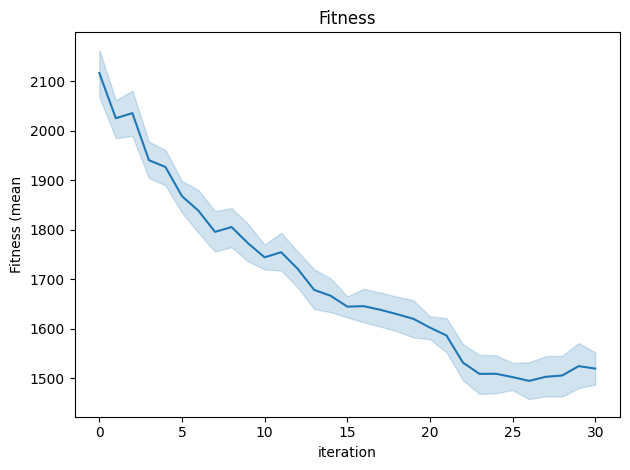

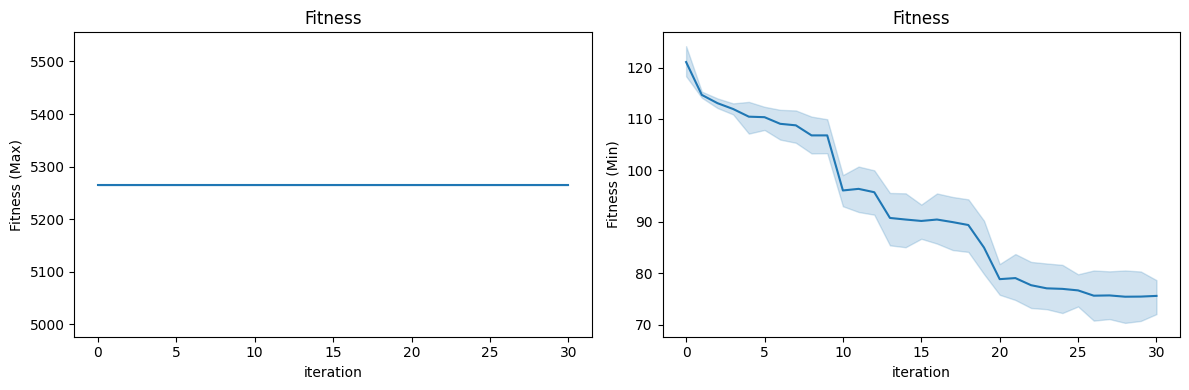

In [3]:
# --- Plot 1: Mean ---
fig, axes = plt.subplots()
sns.lineplot(data=metric_df, x=X_AXIS, y="averageFitness")
axes.set_title("Fitness")
axes.set_xlabel(X_AXIS)
axes.set_ylabel("Fitness (mean")

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=metric_df, x=X_AXIS, y='maxFitness', ax=axes[0])
axes[0].set_title('Fitness')
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel('Fitness (Max)')

# --- Plot 2: Min ---
sns.lineplot(data=metric_df, x=X_AXIS, y='minFitness', ax=axes[1])
axes[1].set_title("Fitness")
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel('Fitness (Min)')

plt.tight_layout()
plt.show()

Population

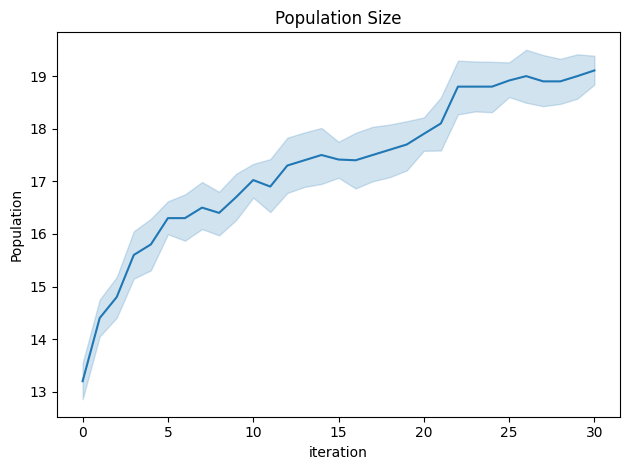

In [4]:
# --- Plot 1: Mean ---

fig, axes = plt.subplots()
sns.lineplot(data=metric_df, x=X_AXIS, y="populationSize")
axes.set_title("Population Size")
axes.set_xlabel(X_AXIS)
axes.set_ylabel("Population")


plt.tight_layout()
plt.show()

Ausgabe Fitnessvarianz

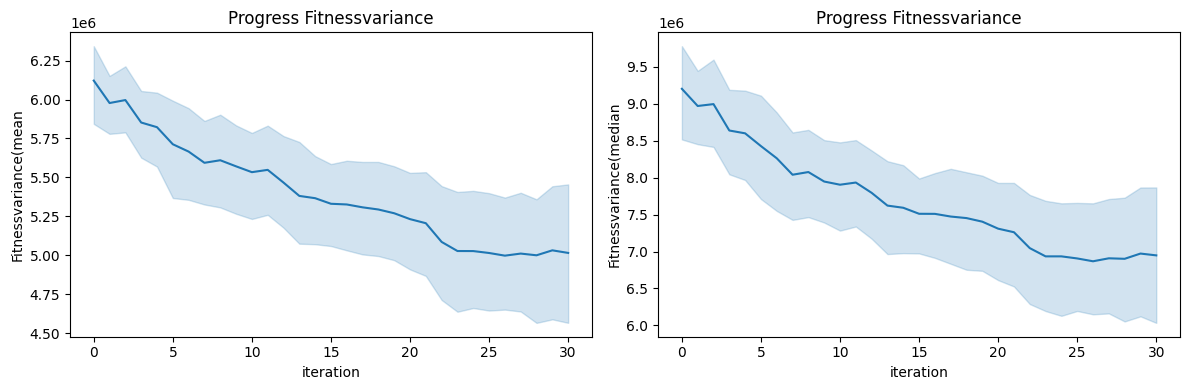

In [5]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == FV + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + FV_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(FV_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == FV + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + FV_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(FV_LONG + '(median')

plt.tight_layout()
plt.show()


Ausgabe PIC

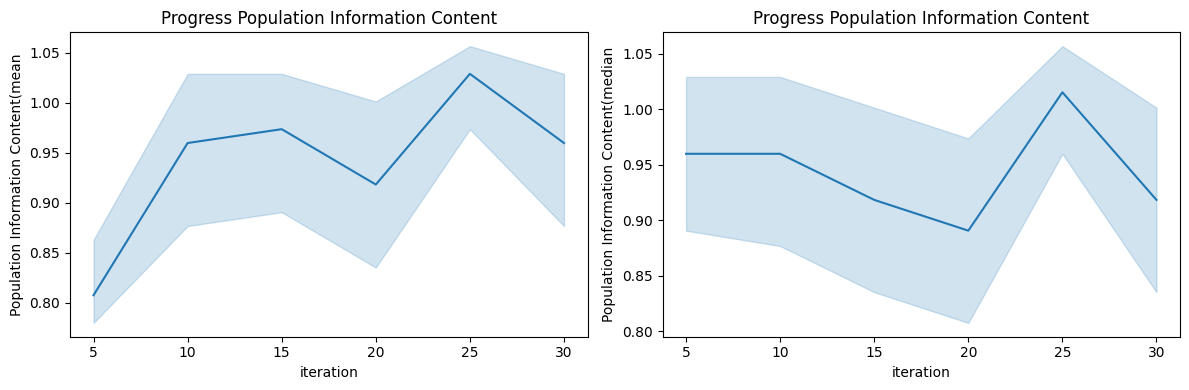

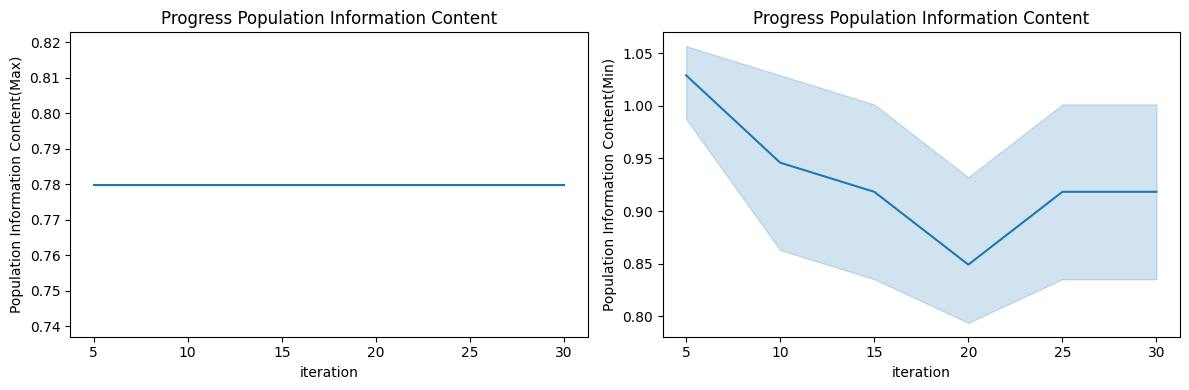

In [6]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == PIC + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + PIC_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(PIC_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == PIC + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + PIC_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(PIC_LONG + '(median')

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
df_max = metric_df[metric_df['metric'] == PIC + MAX]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_max, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + PIC_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(PIC_LONG + '(Max)')

# --- Plot 2: Min ---
df_min = metric_df[metric_df['metric'] == PIC + MIN]
sns.lineplot(data=df_min, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + PIC_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(PIC_LONG + '(Min)')

plt.tight_layout()
plt.show()

Change Rate

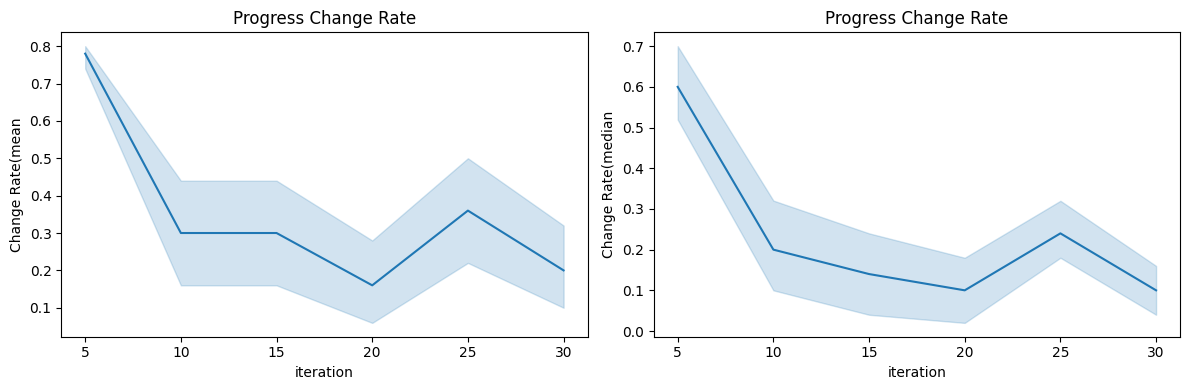

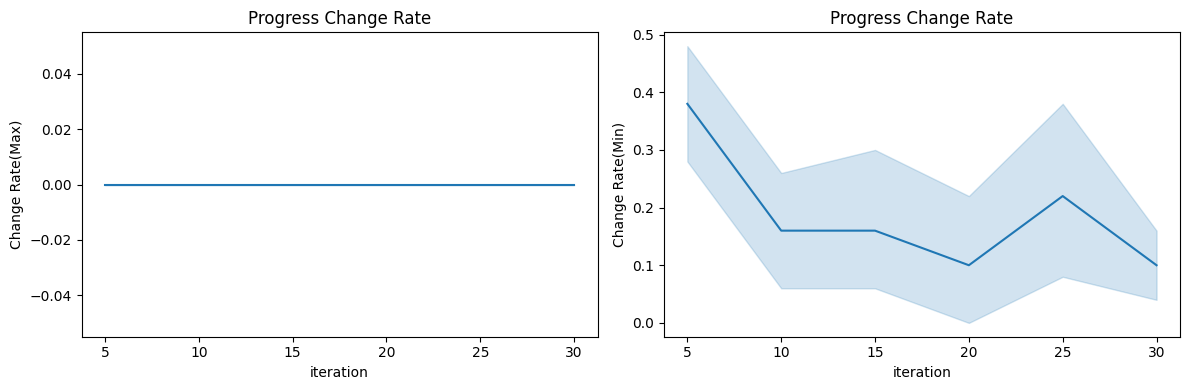

In [7]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == CR + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + CR_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(CR_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == CR + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + CR_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(CR_LONG + '(median')

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
df_max = metric_df[metric_df['metric'] == CR + MAX]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_max, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + CR_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(CR_LONG + '(Max)')

# --- Plot 2: Min ---
df_min = metric_df[metric_df['metric'] == CR + MIN]
sns.lineplot(data=df_min, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + CR_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(CR_LONG + '(Min)')

plt.tight_layout()
plt.show()

Autocorrelation

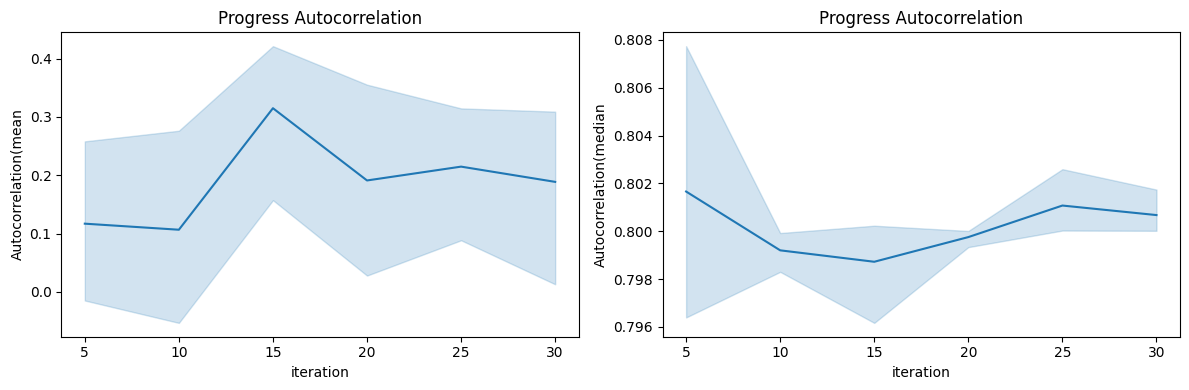

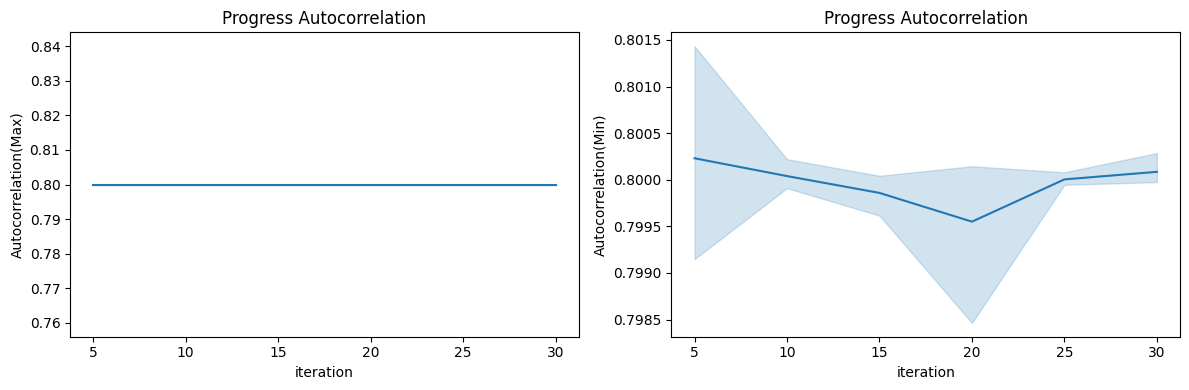

In [8]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == AC + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + AC_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(AC_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == AC + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + AC_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(AC_LONG + '(median')

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
df_max = metric_df[metric_df['metric'] == AC + MAX]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_max, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + AC_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(AC_LONG + '(Max)')

# --- Plot 2: Min ---
df_min = metric_df[metric_df['metric'] == AC + MIN]
sns.lineplot(data=df_min, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + AC_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(AC_LONG + '(Min)')

plt.tight_layout()
plt.show()

Neutrality Volume

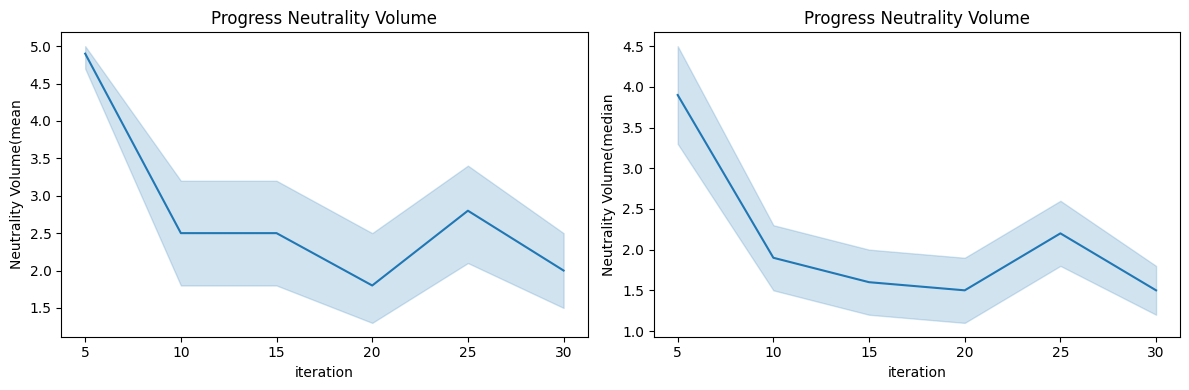

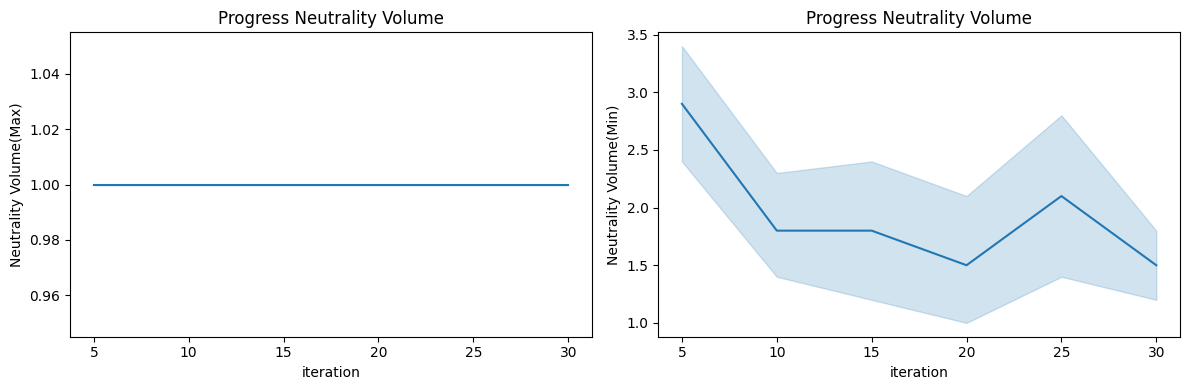

In [9]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == NV + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + NV_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(NV_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == NV + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + NV_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(NV_LONG + '(median')

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
df_max = metric_df[metric_df['metric'] == NV + MAX]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_max, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + NV_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(NV_LONG + '(Max)')

# --- Plot 2: Min ---
df_min = metric_df[metric_df['metric'] == NV + MIN]
sns.lineplot(data=df_min, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + NV_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(NV_LONG + '(Min)')

plt.tight_layout()
plt.show()

Diversität

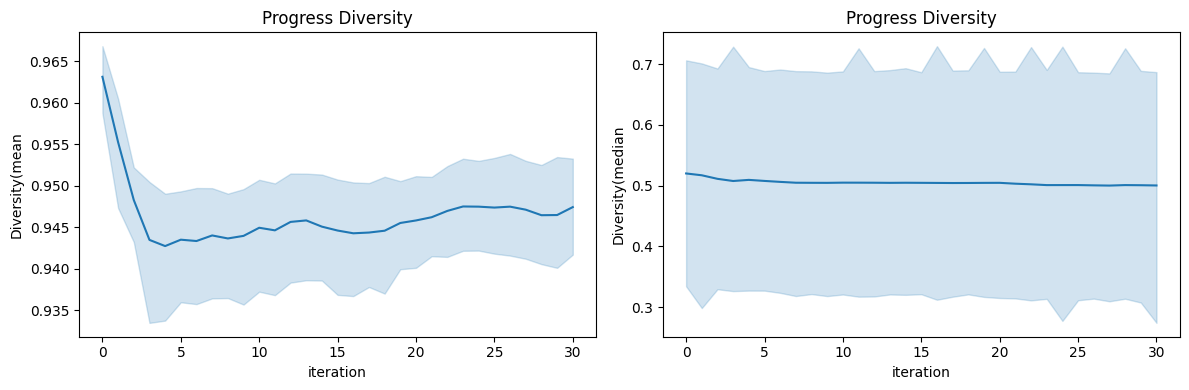

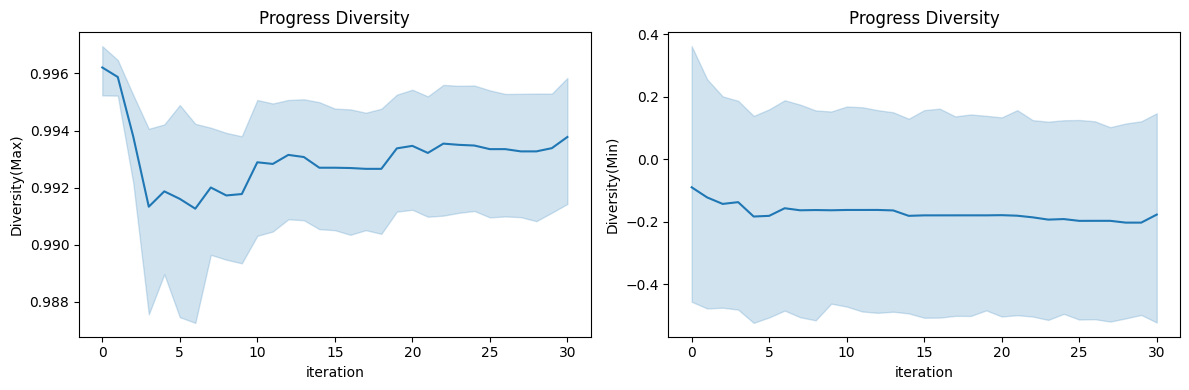

In [10]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == DIV + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + DIV_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(DIV_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == DIV + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + DIV_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(DIV_LONG + '(median')

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
df_max = metric_df[metric_df['metric'] == DIV + MAX]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_max, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + DIV_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(DIV_LONG + '(Max)')

# --- Plot 2: Min ---
df_min = metric_df[metric_df['metric'] == DIV + MIN]
sns.lineplot(data=df_min, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + DIV_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(DIV_LONG + '(Min)')

plt.tight_layout()
plt.show()

Function Dispersion

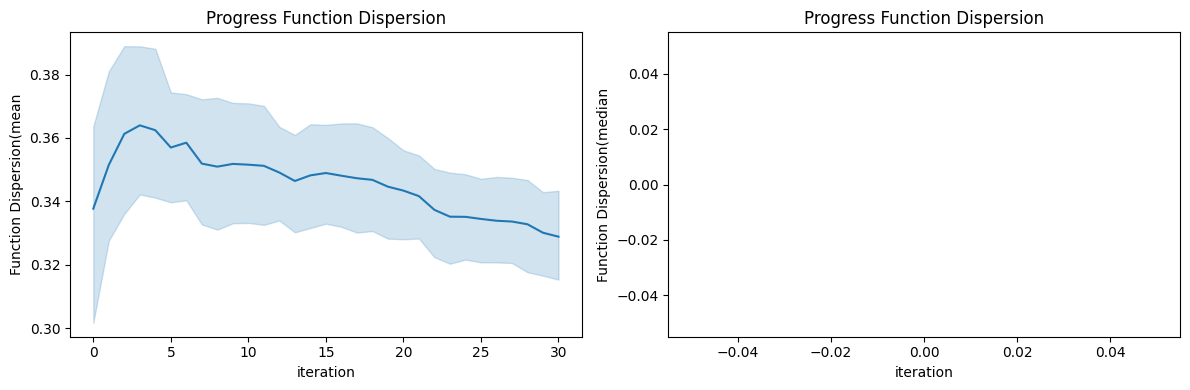

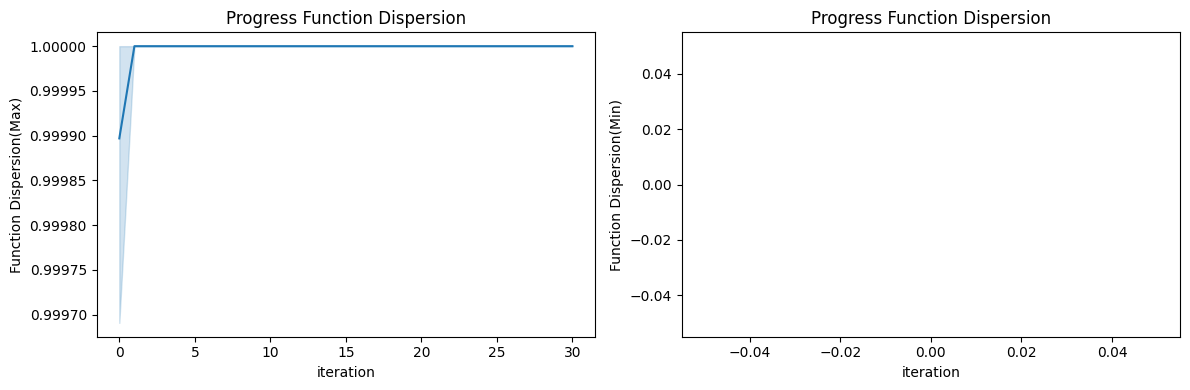

In [11]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == FD + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + FD_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(FD_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == FD + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + FD_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(FD_LONG + '(median')

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
df_max = metric_df[metric_df['metric'] == FD + MAX]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_max, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + FD_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(FD_LONG + '(Max)')

# --- Plot 2: Min ---
df_min = metric_df[metric_df['metric'] == FD + MIN]
sns.lineplot(data=df_min, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + FD_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(FD_LONG + '(Min)')

plt.tight_layout()
plt.show()

State Variance

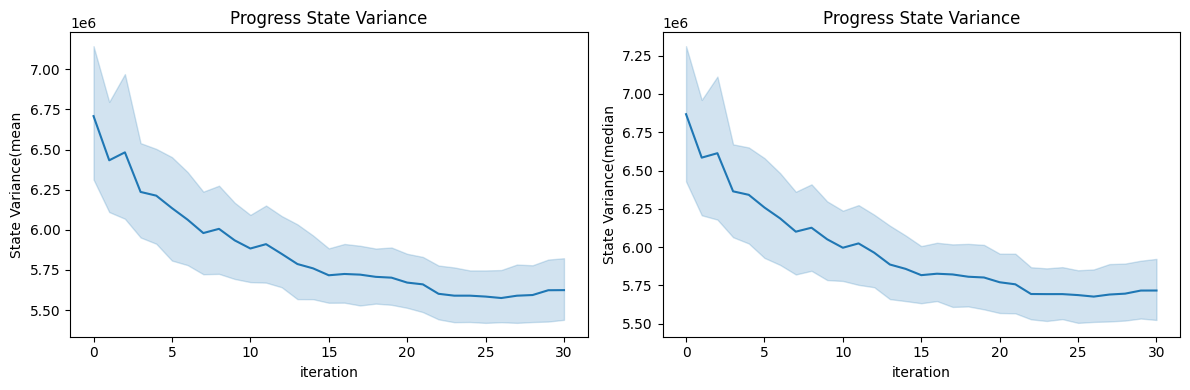

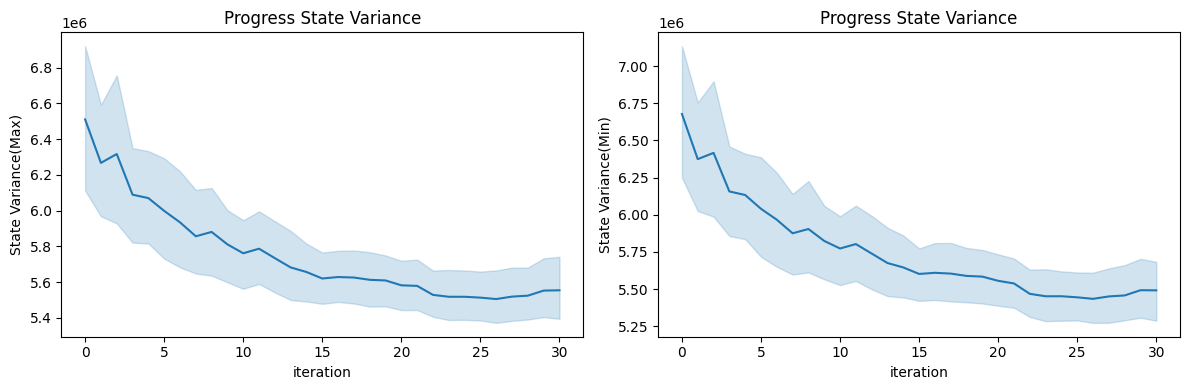

In [12]:
# --- Plot 1: Mean ---
df_mean = metric_df[metric_df['metric'] == SV + MEAN]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_mean, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + SV_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(SV_LONG + '(mean')

# --- Plot 2: Median ---
df_median = metric_df[metric_df['metric'] == SV + MEDIAN]
sns.lineplot(data=df_median, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + SV_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(SV_LONG + '(median')

plt.tight_layout()
plt.show()

# --- Plot 1: Max ---
df_max = metric_df[metric_df['metric'] == SV + MAX]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(data=df_max, x=X_AXIS, y=Y_AXIS, ax=axes[0])
axes[0].set_title(TITLE_PREFIX + SV_LONG)
axes[0].set_xlabel(X_AXIS)
axes[0].set_ylabel(SV_LONG + '(Max)')

# --- Plot 2: Min ---
df_min = metric_df[metric_df['metric'] == SV + MIN]
sns.lineplot(data=df_min, x=X_AXIS, y=Y_AXIS, ax=axes[1])
axes[1].set_title(TITLE_PREFIX + SV_LONG)
axes[1].set_xlabel(X_AXIS)
axes[1].set_ylabel(SV_LONG + '(Min)')

plt.tight_layout()
plt.show()